In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string


In [2]:
import chardet
with open('/Users/Dataset/Email.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result


{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

## Import dataset

In [3]:
data = pd.read_csv('/Users/Dataset/Email.csv',encoding= 'Windows-1252')


In [4]:
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.shape


(5572, 5)

In [6]:
# dat = data.iloc[0:1,0:]

###### Data Cleaning

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


###### Last three columns have no data so we can drop these unnecessary columns

In [8]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)


###### Rename column name

In [9]:
data.rename(columns={'v1':'target','v2': 'message' }, inplace=True)


###### Incoding target column data with label encoder

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])


In [65]:
encoder.classes_

array(['ham', 'spam'], dtype=object)

###### Check if there are any missing values and duplocate rows or not

In [11]:
data.isnull().any()


target     False
message    False
dtype: bool

In [12]:
data.duplicated().sum()


403

In [13]:
data = data.drop_duplicates(keep='first')


In [14]:
data.duplicated().sum()


0

In [15]:
data.shape


(5169, 2)

In [16]:
data.head()


,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


###### EDA

In [17]:
data['target'].value_counts()


0    4516
1     653
Name: target, dtype: int64

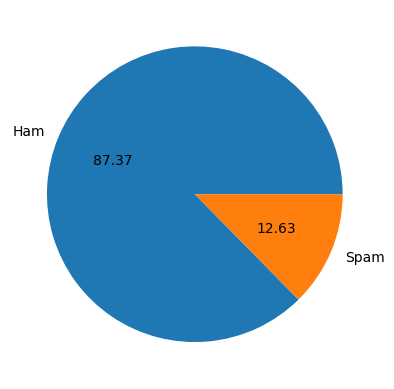

In [18]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(), labels=['Ham', 'Spam'], autopct='%0.2f')
plt.show();


###### Coun total number of words in message

In [19]:
data['Message_Length']=data['message'].apply(len) 


###### Count total number of words in message

In [20]:
data['total_word']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))


###### Count total number of sentance in message

In [21]:
data['sentance_count'] = data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [22]:
data.head()


,target,message,Message_Length,total_word,sentance_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
data.head()


,target,message,Message_Length,total_word,sentance_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
data.describe()


,target,Message_Length,total_word,sentance_count
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [25]:
data.head()


,target,message,Message_Length,total_word,sentance_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
data[['Message_Length', 'total_word','sentance_count']].describe()


,Message_Length,total_word,sentance_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
data[data['target']==0][['Message_Length', 'total_word','sentance_count']].describe()


,Message_Length,total_word,sentance_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
data[data['target']==1][['Message_Length', 'total_word','sentance_count']].describe()


,Message_Length,total_word,sentance_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


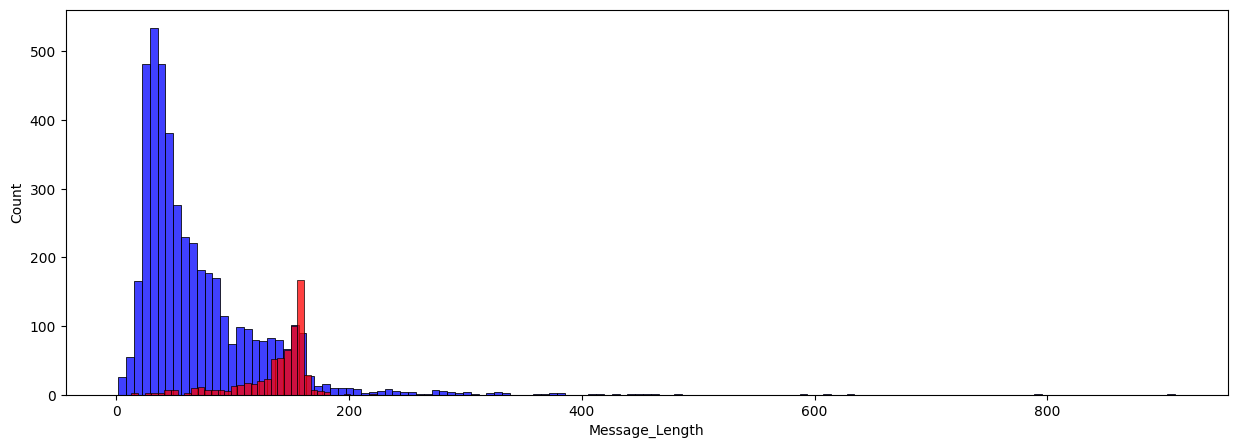

In [29]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(data[data['target']==0]['Message_Length'], color='blue')
sns.histplot(data[data['target']==1]['Message_Length'], color='red')
plt.show();


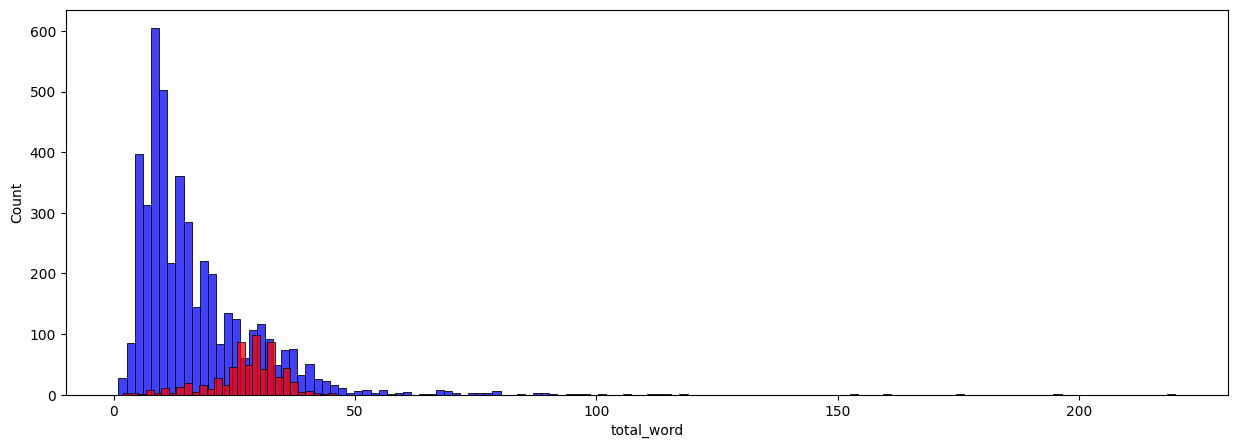

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(data[data['target']==0]['total_word'], color='blue')
sns.histplot(data[data['target']==1]['total_word'], color='red')
plt.show();


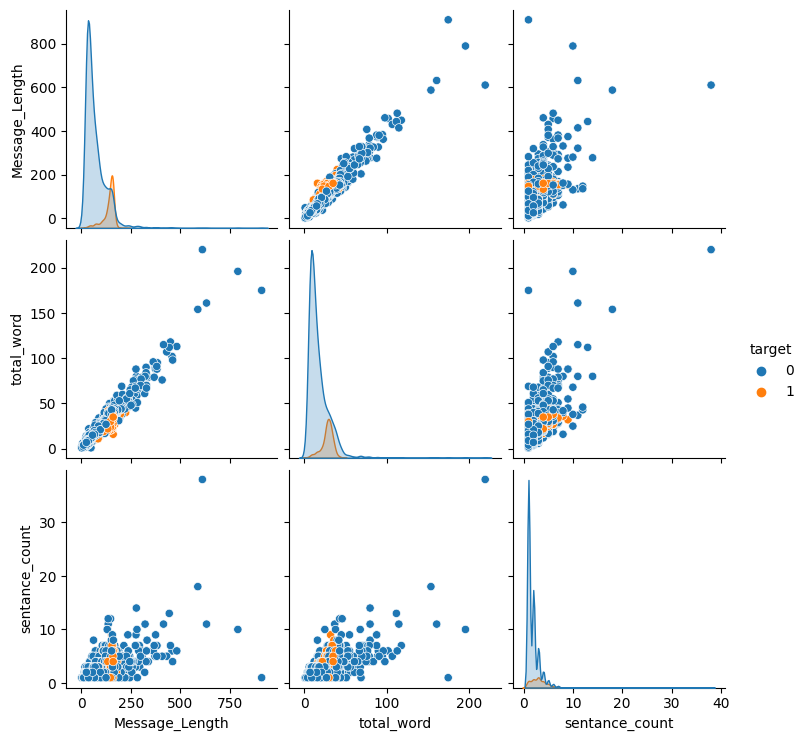

In [31]:
sns.pairplot(data, hue='target')


/var/folders/c3/mcz1hw4s6qnbldhn0ss67r6r0000gn/T/ipykernel_28961/2652063489.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True);


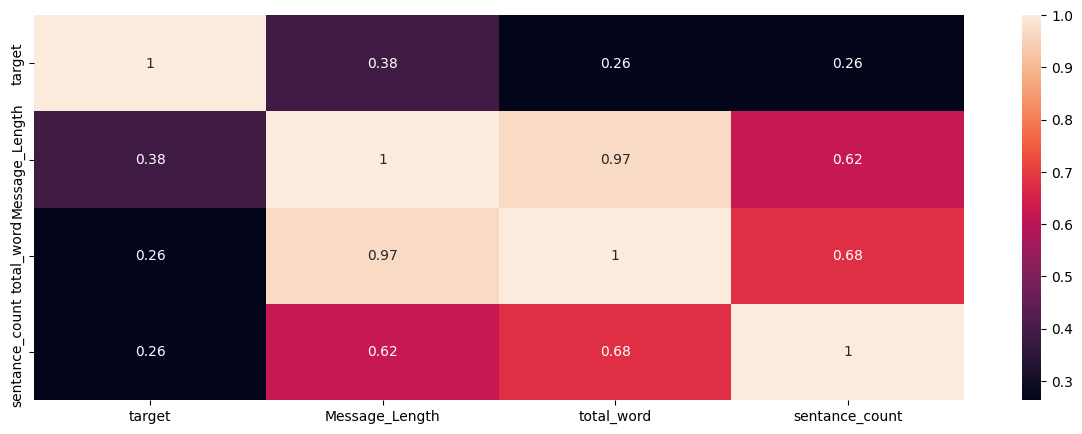

In [32]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True);


## Data Preprocessing
* Convert to lower case.
* Tokenizer
* Removing special character
* Removing stop word and Punctuation
* Steamming

In [33]:
from nltk import PorterStemmer
po=PorterStemmer()


In [34]:
def msg_transform(message):
    msg = message.lower() ## convert all character to lower case
    msg = nltk.word_tokenize(msg) ## convert message to list

    word=[]
    for i in msg:
        if i.isalnum():
            word.append(i) ## filter all alphanumeric words

    y = word[:]
    word.clear()
    for i in y:
        if i not in stopwords.words('english') and i not in string.punctuation:
            word.append(i)
            
    y = word[:]
    word.clear()
    for i in y :
        word.append(po.stem(i))
    
    return " ".join(word)


In [35]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
data['tranform_msg'] = data['message'].apply(msg_transform)

In [37]:
data.head()

,target,message,Message_Length,total_word,sentance_count,tranform_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=8,background_color='white')


In [39]:
spm_pic = wc.generate(data[data['target']==1]['tranform_msg'].str.cat(sep=" "))


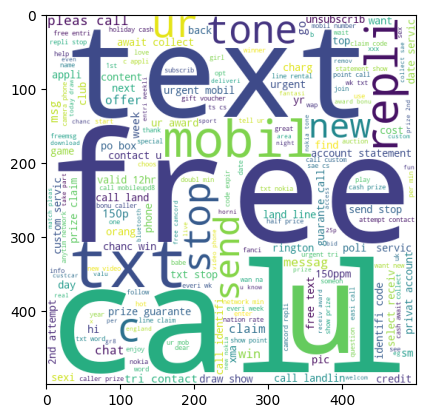

In [40]:
plt.imshow(spm_pic);


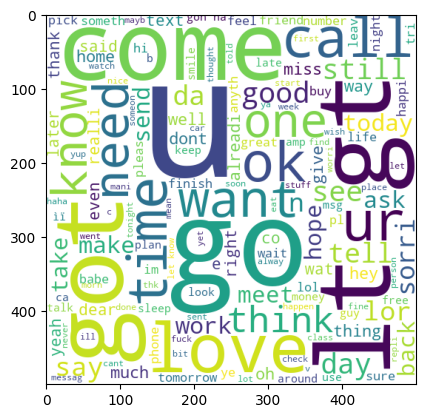

In [41]:
ham_pic = wc.generate(data[data['target']==0]['tranform_msg'].str.cat(sep=" "))
plt.imshow(ham_pic);

In [42]:
spam_corpus=[]
for msg in data[data['target']==1]['tranform_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [43]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(50))

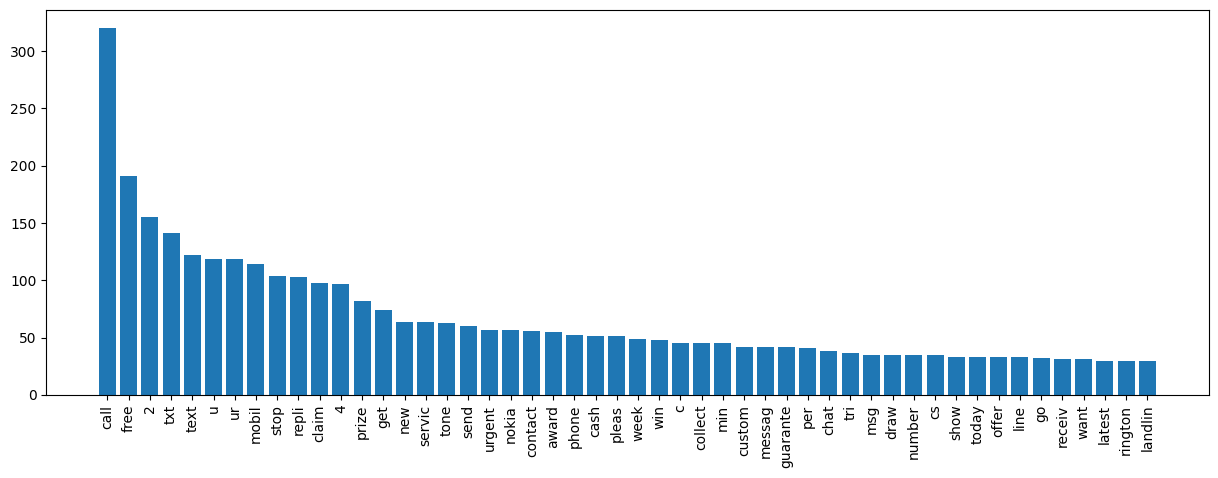

In [44]:
plt.figure(figsize=(15,5))
plt.bar(spam_df[0], spam_df[1])
plt.xticks(rotation=90)
plt.show();

In [45]:
spam_corpus=[]
for msg in data[data['target']==0]['tranform_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [46]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(50))


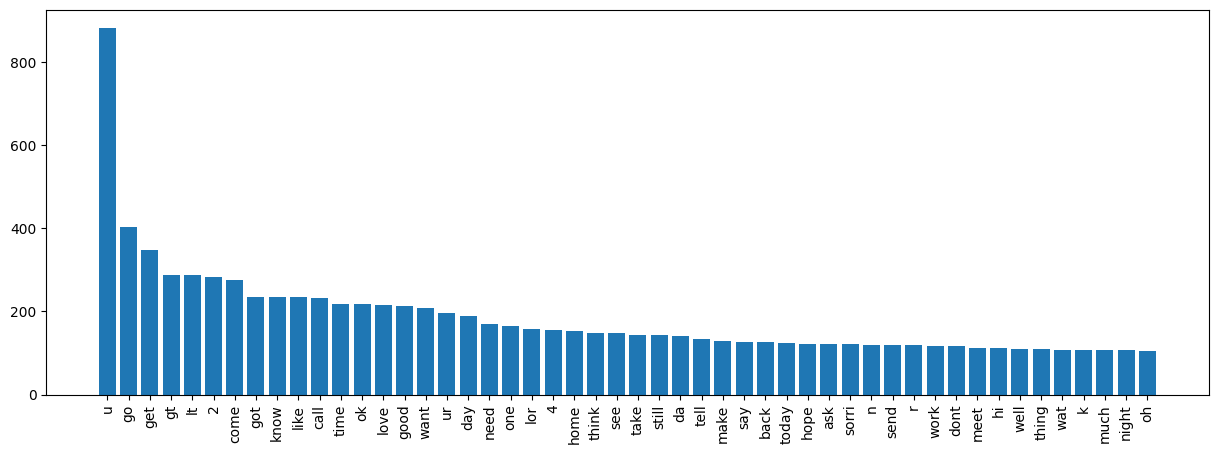

In [47]:
plt.figure(figsize=(15,5))
plt.bar(spam_df[0], spam_df[1])
plt.xticks(rotation=90)
plt.show();


## Build Model

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv = CountVectorizer()
x=cv.fit_transform(data['tranform_msg']).toarray()

In [50]:
print(x[0])

[0 0 0 ... 0 0 0]


In [51]:
from sklearn.model_selection  import train_test_split
xtrain, xtest , ytrain, ytest = train_test_split(x, data['target'], test_size=0.2,random_state=666)

In [52]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)


GaussianNB()

In [53]:
y_pred = gnb.predict(xtest)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
accuracy_score(ytest,y_pred)

0.874274661508704

In [112]:
confusion_matrix(ytest, y_pred)

array([[768, 114],
       [ 16, 136]])

#### From above it is clear that this model precison is better

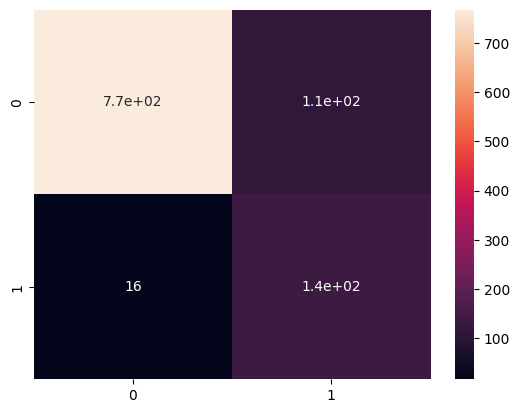

In [56]:
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True);

#### Testing model

In [104]:
text='golden offer.'

In [105]:
text = msg_transform(text)

In [106]:
text = [text]

In [107]:
print(text)

['golden offer']


In [108]:
text = cv.transform(text).toarray()

In [109]:
text_pred = gnb.predict(text)

In [110]:
text_pred[0]

1

In [111]:
(encoder.inverse_transform(text_pred))[0]

'spam'